# Clasificación vino verde (redes neuronales)

El objetivo de esta entrega es entrenar una red neuronal para la clasificación de las puntuaciones de calidad de las botellas de vino. Para ello, habrá que definir una red neuronal con un cierto número de capas intermedias (entre 2 y 5), seleccionar el número de neuronas por capa, ajustar las funciones de activación, y adecuar la capa de entrada y de salida.
 
Además de la accuracy (que se calcula automáticamente durante las épocas de entrenamiento), es conveniente mostrar la matriz de confusión.

## Estructurar datos

In [2]:
import pandas as pd

# Load in the red wine data from the UCI ML website.
df_redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [3]:
# Take a look
print(df_redwine.head(10))
# Data dimensionality (rows, colums)
print(df_redwine.shape)
# Data distributing
df_redwine.info()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [4]:
from sklearn.model_selection import train_test_split
import seaborn as sns

#datos
X = df_redwine.drop('quality', axis=1) 
#nota (lo q tenemos q adivinar)
y = df_redwine['quality'] 

#dividir en datos de prueba y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#comprobamos los datos recopilados
#sns.pairplot(X_train, diag_kind="kde")

In [5]:
from sklearn.preprocessing import StandardScaler

#normalizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelo base

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf

 
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]), #11 valores (fixed acidity, volatile acidity, etc)
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(11, activation='softmax') #soft max => 11 salidas (0, 1, ...,10) con probabilidades de 0 a 1
])

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 9,803
Trainable params: 9,803
Non-trainable params: 0
_________________________________________________________________


In [7]:
#entrenar modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Epoch 1/50
80/80 [==============================] - 1s 4ms/step - loss: 1.4021 - accuracy: 0.4973 - val_loss: 1.1080 - val_accuracy: 0.5594
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.0036 - accuracy: 0.5778 - val_loss: 1.0733 - val_accuracy: 0.5719
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9477 - accuracy: 0.6138 - val_loss: 1.0444 - val_accuracy: 0.6000
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9210 - accuracy: 0.6059 - val_loss: 1.0756 - val_accuracy: 0.5688
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.6271 - val_loss: 1.0373 - val_accuracy: 0.5969
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.6247 - val_loss: 1.0607 - val_accuracy: 0.5938
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.8578 - accuracy: 0.6325 - val_loss: 1.0916 - val_accuracy: 0.5844
Epoch 8/50
80/80 [==

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.397963,0.849883,1.401639,0.606250,45
46,0.389873,0.846755,1.449251,0.593750,46
47,0.393404,0.843628,1.430262,0.590625,47
48,0.372075,0.856919,1.489627,0.615625,48
49,0.354606,0.874902,1.505302,0.618750,49


### Gráficas de rendimiento

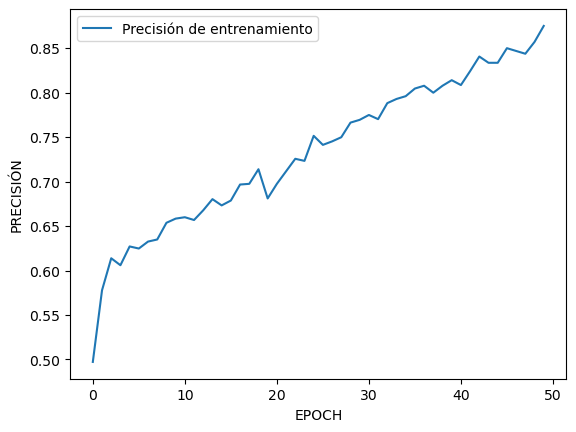

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('EPOCH')
plt.ylabel('PRECISIÓN')
plt.plot(hist['epoch'], hist['accuracy'], label='Precisión de entrenamiento') 
plt.legend()
plt.show()




10/10 [==============================] - 0s 1ms/step


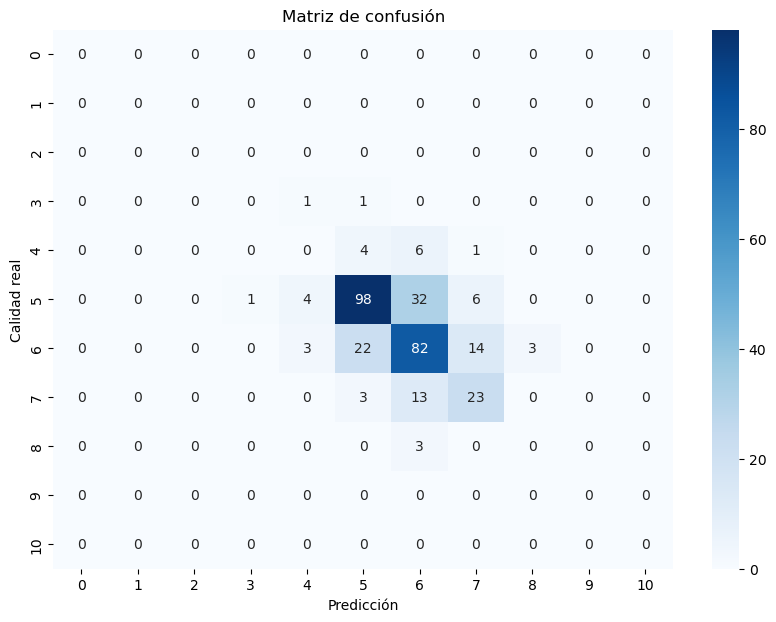

In [65]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

#clase con mayor probabilidad
y_pred_classes = np.argmax(y_pred, axis=1)

#forzamos a que aparezcan todos el rango
possible_qualities = np.arange(11)

cm = confusion_matrix(y_test, y_pred_classes, labels=possible_qualities)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Calidad real')
plt.title('Matriz de confusión')
plt.show()

## Gráficas de rendimiento

In [10]:
model_improved = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),  # desactiva 30% de las neuronas de la capa (evita dependencia)
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  #penalizacion pesos grandes (util con pocos datos)
    layers.Dense(64, activation='relu'),
    layers.Dense(11, activation='softmax')
])

model_improved.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 11)                715       
                                                                 
Total params: 9,803
Trainable params: 9,803
Non-trainable params: 0
_________________________________________________________________


In [29]:
#entrenar modelo 2
history_improved = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
hist_improved = pd.DataFrame(history_improved.history)
hist_improved['epoch'] = history_improved.epoch
hist_improved.tail()

Epoch 1/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 4.3206 - val_accuracy: 0.6281
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 4.7049 - val_accuracy: 0.6156
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9726 - val_loss: 4.3074 - val_accuracy: 0.6375
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9750 - val_loss: 4.4190 - val_accuracy: 0.6438
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9773 - val_loss: 4.4277 - val_accuracy: 0.6187
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9851 - val_loss: 4.3596 - val_accuracy: 0.6500
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 4.2899 - val_accuracy: 0.6438
Epoch 8/50
80/80 [==

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.014289,0.995309,4.932849,0.628125,45
46,0.099039,0.970289,4.792329,0.643750,46
47,0.103508,0.958561,4.765519,0.603125,47
48,0.273466,0.917123,4.460668,0.606250,48
49,0.147188,0.959343,4.407285,0.634375,49


## Comparación

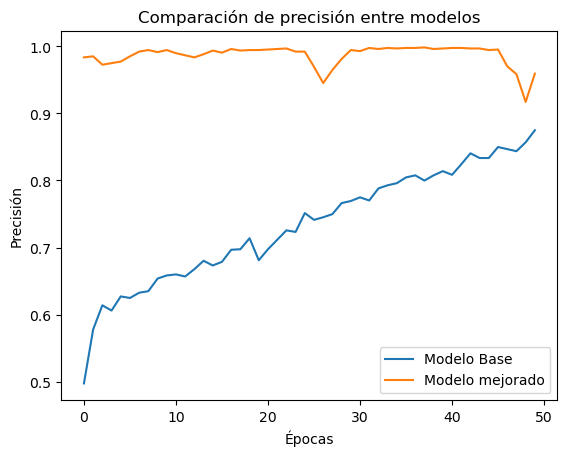

In [31]:
plt.figure()
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.plot(hist['epoch'], hist['accuracy'], label='Modelo Base')
plt.plot(hist_improved['epoch'], hist_improved['accuracy'], label='Modelo mejorado')
plt.legend()
plt.title('Comparación de precisión entre modelos')
plt.show()

10/10 [==============================] - 0s 1ms/step


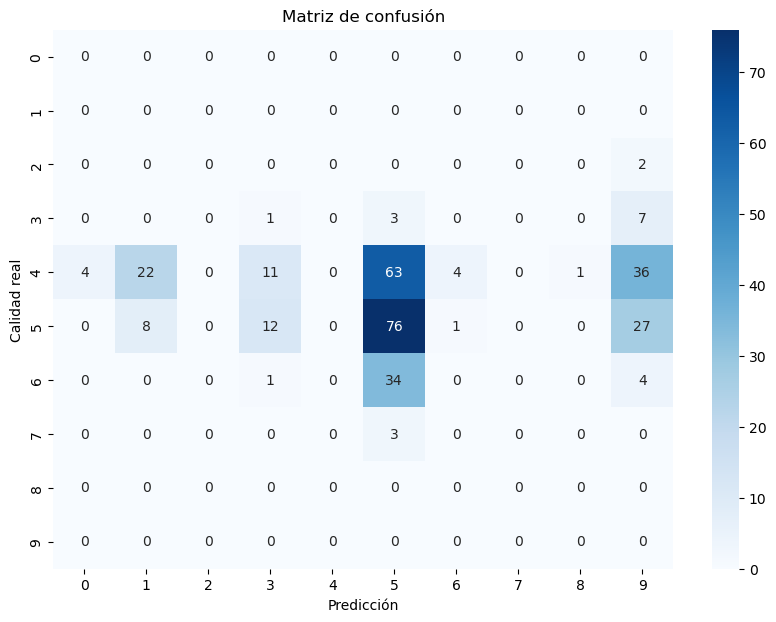

In [57]:
y_pred = model_improved.predict(X_test)

#clase con mayor probabilidad
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Calidad real')
plt.title('Matriz de confusión')
plt.show()